In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
def get_data(filename):
    # df = pd.read_table(filename, sep='   ', header=None)
    # print(df.head())
    data = []
    labels = []
    fr = open(filename)
    for line in fr.readlines():
        lines = line.strip().split()
        data.append([float(lines[0]), float(lines[1])])
        labels.append(int(lines[2]))
    return data, labels


In [3]:
def deal_data(data, labels):
    # Divide the data set
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
    return x_train, x_test, y_train, y_test


In [7]:
def train_test_evaluate(x_train, x_test, y_train, y_test):
    # Training model
    model = LogisticRegression(penalty='l2', max_iter=80)
    model.fit(x_train, y_train)

    # 模型预测
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    # 模型评估,使用f1
    f1 = f1_score(y_train, y_train_pred)
    print("Training set f1: " + str(f1))
    f1 = f1_score(y_test, y_pred)
    print("Test set f1: " + str(f1))

    w = model.coef_
    b = model.intercept_
    return w, b

In [5]:
def draw_result(x_train, x_test, y_train, y_test, w, b):
    train_n = np.shape(x_train)[0]   
    test_n = np.shape(x_test)[0]     

    x_train1, y_train1, x_train0, y_train0 = [], [], [], []
    x_test1, y_test1, x_test0, y_test0 = [], [], [], []
    for i in range(train_n):      
        if int(y_train[i]) == 1:
            x_train1.append(x_train[i][0])
            y_train1.append(x_train[i][1])
        else:
            x_train0.append(x_train[i][0])
            y_train0.append(x_train[i][1])

    for i in range(test_n):      
        if int(y_test[i]) == 1:
            x_test1.append(x_test[i][0])
            y_test1.append(x_test[i][1])
        else:
            x_test0.append(x_test[i][0])
            y_test0.append(x_test[i][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Draw the sample points of the test set and training set
    ax.scatter(x_train1, y_train1, s=30, c='red')
    ax.scatter(x_train0, y_train0, s=30, c='green', marker='s')

    ax.scatter(x_test1, y_test1, s=30, c='yellow')
    ax.scatter(x_test0, y_test0, s=30, c='blue', marker='s')

    # Draw the decision boundary of logistic regression
    # w1x1 + w2x2 + b = 0
    # x : x1;
    # y: x2 = (-w1x1 - b)/ w2
    x = np.linspace(-4, 3.1, 1000)
    y = (- w[0][0] * x - b) / w[0][1]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


Training set f1: 0.9438202247191012
Test set f1: 1.0


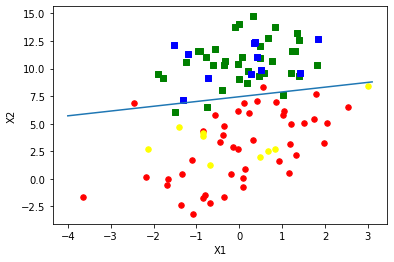

In [8]:
if __name__=='__main__':
   
    filename = '/Users/mac/Desktop/Maching learing/Dataset_SomeFiles/environment.txt'  
    data, labels = get_data(filename)

    x_train, x_test, y_train, y_test = deal_data(data, labels)

    w, b = train_test_evaluate(x_train, x_test, y_train, y_test)
    
    draw_result(x_train, x_test, y_train, y_test, w, b)
